    This script is similar like ANN_example3.ipynb. It includes the weather condition ("Rain" and "Sun") as the input fetures. The accuracy is not good than ANN_example3.ipynb.
    Development Date: 2018.07.01

In [ ]:
import csv
import pandas as pd
sample_df = pd.read_csv("LeaveTimesTrips_JUN.csv")
sample_df.count()
#sample_df.head()

In [202]:
# How many lines
lines = sample_df['LineId'].unique()
print(len(lines))

123


In [203]:
sample_df = sample_df[(sample_df['LineId']=='39A')]
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Passengers,Passengersin,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction
260,5108092,DB,2017-06-28,58,751,42071,42071,44775,44782,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
261,5108092,DB,2017-06-28,26,4747,39484,39484,39865,39957,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
262,5108092,DB,2017-06-28,43,1713,40674,40674,41219,41219,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
263,5108092,DB,2017-06-28,59,752,42137,42137,44875,44886,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
264,5108092,DB,2017-06-28,27,1845,39882,39882,40305,40314,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2


In [204]:
sample_df.ProgrNumber.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [205]:
import datetime
# Filter Monday days from other days
def my_test(d):
    a,b,c = d.split('-')
    return datetime.datetime(int(a),int(b),int(c)).weekday() == 1
sample_df['isMondayDay'] = sample_df.apply(lambda row: my_test(row['DayOfService']), axis=1)

In [206]:
def my_test3(d, a):
    #return str(a//3600).zfill(2) + ":" + str(a%3600//60).zfill(2)+ ":" + str(a%3600%60).zfill(2)
    return  d + " " + str(a//3600).zfill(2) + ":" + str(0).zfill(2) + ":" + str(0).zfill(2)
    #return a/3600
sample_df['dayInterval'] = sample_df.apply(lambda row: my_test3(row['DayOfService'],row['PlannedTime_Arr']), axis=1)

In [207]:
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,...,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction,isMondayDay,dayInterval
260,5108092,DB,2017-06-28,58,751,42071,42071,44775,44782,1000922,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-28 11:00:00
261,5108092,DB,2017-06-28,26,4747,39484,39484,39865,39957,1000922,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-28 10:00:00
262,5108092,DB,2017-06-28,43,1713,40674,40674,41219,41219,1000922,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-28 11:00:00
263,5108092,DB,2017-06-28,59,752,42137,42137,44875,44886,1000922,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-28 11:00:00
264,5108092,DB,2017-06-28,27,1845,39882,39882,40305,40314,1000922,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-28 11:00:00


In [208]:
w_df = pd.read_csv("Weather.csv")

In [209]:
# Only select weather information from 'Casement'
w_df = w_df[(w_df['StationName'] == 'Casement')]

In [210]:
#new_res = pd.merge(res, weather_df, on = ['TripId', 'DayOfService'])
new_sample_df = sample_df.merge(w_df, left_on='dayInterval', right_on='Date')

In [211]:
stations = new_sample_df['ProgrNumber'].sort_values().unique()

In [212]:
# Drop several columns
sample_df = new_sample_df.drop(['DataSource','Passengers', 'Passengersin','Distance', 'Suppressed','JustificationId','LastUpdate','Note','VehicleId', 'LineId', 'RouteId'], axis=1)
sample_df.head()

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction,isMondayDay,dayInterval,Date,Rain,Sun,Temp,Wdsp,StationName
0,5108092,2017-06-28,58,751,42071,42071,44775,44782,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
1,5108092,2017-06-28,43,1713,40674,40674,41219,41219,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
2,5108092,2017-06-28,59,752,42137,42137,44875,44886,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
3,5108092,2017-06-28,27,1845,39882,39882,40305,40314,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
4,5108092,2017-06-28,44,1714,40716,40716,41243,41258,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement


In [213]:
sample_df = sample_df.drop(['dayInterval','Date', 'StationName', 'Temp', 'Wdsp'], axis=1)

In [214]:
sample_df.loc[sample_df.Rain > 0.0, 'Rain'] = 1
sample_df.loc[sample_df.Sun > 0, 'Sun'] = 1

In [217]:
sample_df.to_csv("39A_LeaveTimesTripsWeather_JUN.csv")

In [218]:
sample_df = pd.read_csv("39A_LeaveTimesTripsWeather_JUN.csv")

In [219]:
sample_df['isMondayDay'] = sample_df['isMondayDay'].astype('int')
sample_df.dtypes

Unnamed: 0           int64
TripId               int64
DayOfService        object
ProgrNumber          int64
StopPointId          int64
PlannedTime_Arr      int64
PlannedTime_Dep      int64
ActualTime_Arr       int64
ActualTime_Dep       int64
Direction            int64
isMondayDay          int64
Rain               float64
Sun                float64
dtype: object

In [220]:
sample_a_df = sample_df[(sample_df['Direction']) == 1]
sample_b_df = sample_df[(sample_df['Direction']) == 2]

In [221]:
tripids = sample_a_df['TripId'].sort_values().unique()
print(tripids[:100])

[5002343 5002345 5002347 5002349 5002351 5002462 5002464 5002466 5002567
 5003102 5003104 5003106 5003483 5003485 5003487 5003489 5003491 5003603
 5003605 5003607 5003609 5003709 5003711 5003713 5003715 5004029 5004031
 5004033 5004035 5004037 5004039 5004382 5004553 5004555 5004629 5004631
 5004633 5004635 5005106 5005108 5005110 5005112 5005588 5005629 5005631
 5005633 5005984 5005986 5005988 5006273 5006275 5006277 5006279 5006287
 5006289 5006291 5006293 5006295 5006578 5006580 5006582 5006584 5006990
 5006992 5006995 5006997 5006999 5007154 5007156 5007158 5007160 5007162
 5007871 5007873 5007875 5007877 5007879 5007881 5007944 5007946 5007948
 5007950 5007952 5007980 5007983 5007985 5007987 5008034 5008291 5008293
 5008295 5008297 5008299 5008528 5008530 5008532 5009571 5009573 5009575
 5009705]


In [223]:
dayOfService = sample_a_df[(sample_a_df['TripId'] == 5002343)].DayOfService.sort_values().unique()
for day in dayOfService:
    print(day)

2017-06-01
2017-06-02
2017-06-07
2017-06-08
2017-06-09


In [224]:
#temp = sample_a_df[(sample_a_df['TripId'] == 5002790) & (sample_a_df['ProgrNumber'] == 1)]
temp = sample_a_df[(sample_a_df['TripId'] == 5002790) & (sample_a_df['DayOfService'] == '2017-06-02')].sort_values(by='ProgrNumber')
#temp

In [225]:
print(stations)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


In [226]:
oneStationRow = sample_a_df[(sample_a_df['TripId'] == 5004183) \
                            & (sample_a_df['DayOfService'] == '2017-06-01') \
                            & (sample_a_df['ProgrNumber'] == 2 )]
oneStationRow

,Unnamed: 0,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction,isMondayDay,Rain,Sun


In [294]:
# 46A only has 66 stations
count = 1
tag = 0

for tripid in tripids:
    # Pick the first 100 trips
    #if tag >= 100:
    #    break
    #else:
    #    tag += 1
    dayOfService = sample_a_df[(sample_a_df['TripId'] == tripid)].DayOfService.sort_values().unique()
    for day in dayOfService:
        
        timepool = {}
        pool = []
        isUseful = True
        miss_count = 0
        for i in stations:
            oneStationRow = sample_a_df[(sample_a_df['TripId'] == tripid) & (sample_a_df['DayOfService'] == day) & (sample_a_df['ProgrNumber'] == i )]
            #print(oneStationRow)
            try:
                if i < 10:
                    timepool['Rain'] = oneStationRow['Rain'].iloc[0]
                    timepool['Sun'] = oneStationRow['Sun'].iloc[0]
                    #timepool['isMondayDay'] = oneStationRow['isMondayDay'].iloc[0]
                #timepool.append([oneStationRow['PlannedTime_Arr'].iloc[0], oneStationRow['ActualTime_Arr'].iloc[0]])
                timepool['a_{}'.format(i)] = oneStationRow['PlannedTime_Arr'].iloc[0]
                timepool['b_{}'.format(i)] = oneStationRow['ActualTime_Arr'].iloc[0]
                last_plannedtime_arr = oneStationRow['PlannedTime_Arr'].iloc[0]
                last_actualtime_arr = oneStationRow['ActualTime_Arr'].iloc[0]
            except:
                timepool['a_{}'.format(i)] = last_plannedtime_arr + 15
                timepool['b_{}'.format(i)] = last_actualtime_arr + 15
                miss_count += 1
                if miss_count >= 7:
                    isUseful = False
                    break
                continue
        #print('----'*20)
        #print(timepool)
        if isUseful == True:
            print(tripid, day, "===" * 20)
            #print(timepool)
             
            if count == 1:
                df = pd.DataFrame(data=timepool,index=[0])
            else:
                df.loc[count] = timepool
            count += 1
        if count % 10 == 0:
            print(count)

5002343 2017-06-07 ============================================================
5002343 2017-06-08 ============================================================
5002343 2017-06-09 ============================================================
5002345 2017-06-01 ============================================================
5002345 2017-06-07 ============================================================
5002345 2017-06-08 ============================================================
5002345 2017-06-09 ============================================================
5002347 2017-06-07 ============================================================
5002347 2017-06-08 ============================================================
10
5002347 2017-06-09 ============================================================
5002349 2017-06-07 ============================================================
5002349 2017-06-08 ============================================================
5002349 2017-06-09 ==================

5006275 2017-06-10 ============================================================
5006277 2017-06-10 ============================================================
5006279 2017-06-10 ============================================================
5006287 2017-06-10 ============================================================
5006289 2017-06-10 ============================================================
5006291 2017-06-10 ============================================================
5006293 2017-06-10 ============================================================
110
110
5006295 2017-06-10 ============================================================
5007154 2017-06-08 ============================================================
5007156 2017-06-01 ============================================================
5007156 2017-06-02 ============================================================
5007156 2017-06-08 ============================================================
5007156 2017-06-09 =============

5013186 2017-06-07 ============================================================
5013186 2017-06-08 ============================================================
5013186 2017-06-09 ============================================================
5014105 2017-06-08 ============================================================
5014105 2017-06-09 ============================================================
210
210
210
210
5014107 2017-06-07 ============================================================
5014107 2017-06-08 ============================================================
5014107 2017-06-09 ============================================================
5014109 2017-06-07 ============================================================
5014109 2017-06-08 ============================================================
5014109 2017-06-09 ============================================================
5014148 2017-06-07 ============================================================
5014148 2017-06-08 =====

5084972 2017-06-21 ============================================================
5084974 2017-06-19 ============================================================
5084976 2017-06-19 ============================================================
310
5084976 2017-06-20 ============================================================
5084976 2017-06-21 ============================================================
5084978 2017-06-20 ============================================================
5084978 2017-06-21 ============================================================
5085472 2017-06-19 ============================================================
5085472 2017-06-20 ============================================================
5085472 2017-06-21 ============================================================
5085474 2017-06-19 ============================================================
5085474 2017-06-20 ============================================================
5085474 2017-06-21 =================

5090214 2017-06-21 ============================================================
410
410
5090216 2017-06-19 ============================================================
5090216 2017-06-20 ============================================================
5090216 2017-06-21 ============================================================
5090218 2017-06-19 ============================================================
5090218 2017-06-20 ============================================================
5090218 2017-06-21 ============================================================
5090703 2017-06-19 ============================================================
5090703 2017-06-20 ============================================================
5090703 2017-06-21 ============================================================
5090723 2017-06-19 ============================================================
420
5090723 2017-06-20 ============================================================
5090723 2017-06-21 =========

5095354 2017-06-19 ============================================================
5095354 2017-06-20 ============================================================
5095354 2017-06-21 ============================================================
5095356 2017-06-19 ============================================================
5095356 2017-06-20 ============================================================
5095356 2017-06-21 ============================================================
5095358 2017-06-20 ============================================================
5095358 2017-06-21 ============================================================
5095977 2017-06-19 ============================================================
520
5095977 2017-06-21 ============================================================
5095982 2017-06-19 ============================================================
5095982 2017-06-20 ============================================================
5095982 2017-06-21 =================

5114096 2017-06-30 ============================================================
5114098 2017-06-29 ============================================================
5114100 2017-06-30 ============================================================
5114102 2017-06-30 ============================================================
5114104 2017-06-30 ============================================================
5114119 2017-06-30 ============================================================
5114121 2017-06-30 ============================================================
620
5114123 2017-06-30 ============================================================
5114125 2017-06-30 ============================================================
5114582 2017-06-30 ============================================================
5115289 2017-06-29 ============================================================
5115289 2017-06-30 ============================================================
5115291 2017-06-30 =================

In [295]:
df.to_csv("39A_73stations_JUN.csv")

In [296]:
ErrorArray = []
len(df)

645

In [343]:
import csv
import pandas as pd
new_df = pd.read_csv("39A_73stations_JUN.csv")
#new_df = pd.read_csv("FINAL_39A_73stations_JUN.csv")

In [344]:
new_df.Rain.count()

645

In [345]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (6 continous features)
# y Target feature (happiness_class)
a_columns = []
b_columns = []
#columns = []
for i in stations:
    #columns.append('a_{}'.format(i))
    #columns.append('b_{}'.format(i))
    a_columns.append('a_{}'.format(i))
    b_columns.append('b_{}'.format(i))
a_columns.append('Sun')
a_columns.append('Rain')
#a_columns.append("isMondayDay")
X = pd.concat([new_df[a_columns]], axis=1)

y = new_df[b_columns]
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [347]:
# 99% score
clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(100, 100, 100), random_state=1)
#
#clf = MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=600)
#clf = MLPRegressor(hidden_layer_sizes=(5,5,5))
clf.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [348]:
print("Training set score: %f" % clf.score(X_test, y_test))
print("Training set loss: %f" % clf.loss_)

Training set score: 0.994713
Training set loss: 191851.432498


In [349]:
predictions = clf.predict(X_test)

In [350]:
# Plot outputs
#from matplotlib import pyplot as plt
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, predictions, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

In [351]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station = 10
count = 0
errors = []
for i in y_test.index:
    error = predictions[count][station] - y_test.loc[i][station]
    #print(i, "\t", predictions[count][station],"\t", y_test.loc[i][station], "\t", error) 
    errors.append(error)
    count += 1
ErrorArray.append(errors)

Index| prediction |Actual result| error


In [352]:
print(len(ErrorArray[0]))

162


In [353]:
print(len(ErrorArray))

5


In [354]:
import numpy as np
newErrorArray = np.transpose(ErrorArray)

In [355]:
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])
df['BASELINE'] = 0

In [356]:
df.BASELINE.count()

162

<Figure size 432x288 with 0 Axes>

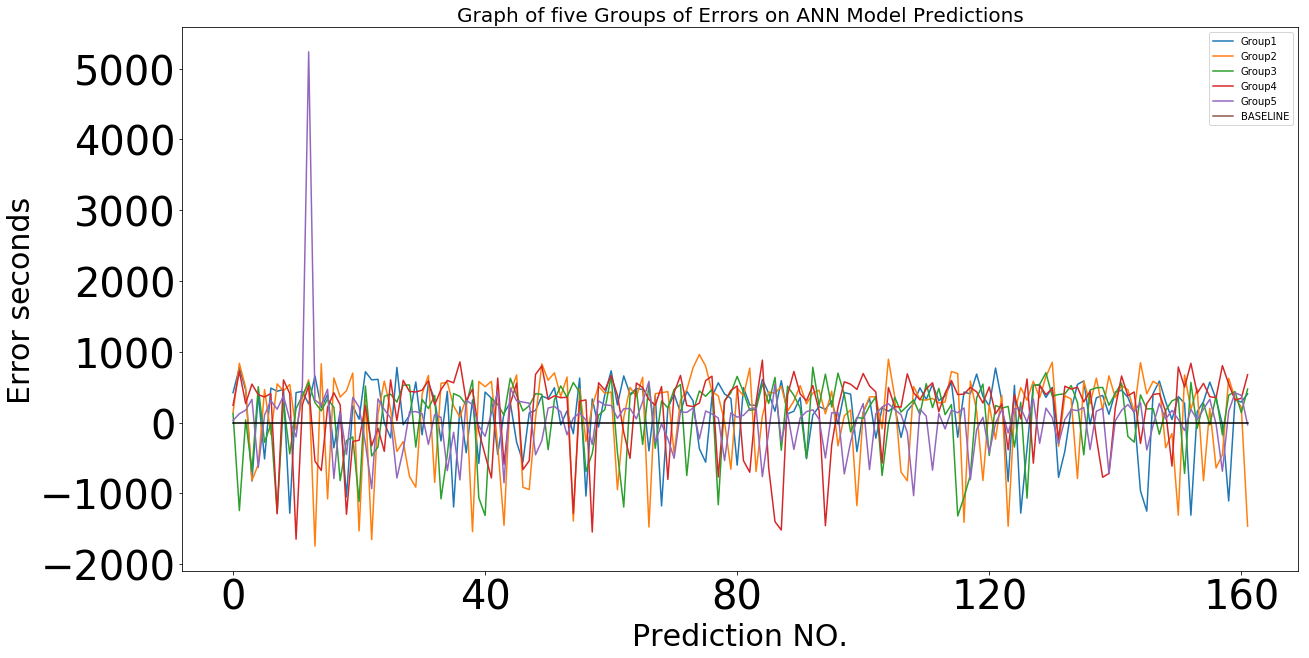

In [357]:
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on ANN Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 162, 40))
plt.show()

In [71]:
# Storage Trained model in a file
'''
import pickle
file = "39A_2017_06.clf"
output = open(file, 'wb')
pickle.dump(clf, output)
output.close()
'''

In [72]:
file = "39A_2017_06.clf"
pkl_file = open(file, 'rb')
new_clf = pickle.load(pkl_file)

# 10-folds crossing-validation testing

In [370]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
def generalCrossValidationData(n_folds=10):
    '''
        This function is to separate DataFrame into k folds groups, each group include 90% train data and 10% test data,
        which is followed k-folds Cross-validation model.
        Input Value:
                - the number of folds, default is 10 folds
        Retrun Value:
                - ({k groups of train dataset}, {k group of test dataset})
    '''
    # Reading from a csv file, into a data frame
    # Drop 'customer' column because it is not continuous feature
    # Randomly shuffle the dataset
    # here you get 70% of the rows for train
    # this code tries to find that train = 70% and test = 30%
    #df = pd.read_csv("39A_73stations_JUN.csv")
    df = pd.read_csv("39A_73stations_JUN.csv")

    # X Descriptive features (6 continous features)
    # y Target feature (happiness_class)
    a_columns = []
    b_columns = []
    # 74 is the total number of 39A bus stations
    #columns = []
    for i in range(1,74):
        a_columns.append('a_{}'.format(i))
        b_columns.append('b_{}'.format(i))
    all_columns = a_columns + b_columns + ['Rain', 'Sun']
    new_df = pd.concat([df[all_columns]], axis=1)
 
    # we use k-folds cross validation model and we separate the data into 10 groups of train & test datasets
    # we use KFold method to separate the dataset based 10-folds Cross-validation rule
    from sklearn.cross_validation import KFold
    kf = KFold(len(new_df), n_folds=n_folds)
    train_index = {}
    test_index = {}
    count = 0
    for indexA, indexB in kf:
        train_index[count] = indexA
        test_index[count] = indexB
        count += 1

    trains = {}
    tests = {}
    for i in range(10):
        trains[i] = new_df.loc[train_index[i]]
        tests[i] = new_df.loc[test_index[i]]
    return (trains, tests)

In [371]:
trains, tests = generalCrossValidationData(10)

In [372]:
trains[0].head()

,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,...,b_66,b_67,b_68,b_69,b_70,b_71,b_72,b_73,Rain,Sun
65,43200.0,43330.0,43353.0,43397.0,43415.0,43452.0,43494.0,43543.0,43609.0,43670.0,...,49308.0,49353.0,49429.0,49497.0,49524.0,49577.0,49631.0,49703.0,0.0,1.0
66,43200.0,43330.0,43353.0,43397.0,43415.0,43452.0,43494.0,43543.0,43609.0,43670.0,...,48368.0,48410.0,48494.0,48581.0,48609.0,48670.0,48704.0,48727.0,0.0,1.0
67,55200.0,55366.0,55396.0,55459.0,55485.0,55538.0,55569.0,55606.0,55656.0,55717.0,...,60999.0,61039.0,61122.0,61209.0,61242.0,61310.0,61343.0,61369.0,1.0,1.0
68,55200.0,55366.0,55396.0,55459.0,55485.0,55538.0,55569.0,55606.0,55656.0,55717.0,...,60783.0,60820.0,60894.0,60969.0,61002.0,61062.0,61091.0,61110.0,0.0,0.0
69,68400.0,68520.0,68580.0,68634.0,68656.0,68700.0,68748.0,68804.0,68880.0,68940.0,...,72768.0,72830.0,72894.0,72977.0,72991.0,73065.0,73080.0,73080.0,0.0,0.0


In [373]:
# 10-fold crossing validation testing
scores = 0
vscores = 0
MSES = 0
a_columns = []
b_columns = []
for i in range(1,74):
        a_columns.append('a_{}'.format(i))
        b_columns.append('b_{}'.format(i))
#all_columns = a_columns + b_columns
a_columns = ['Rain', 'Sun'] + a_columns
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (4 features)
# y Target feature (TripDuration)
scores = 0
for i in range(10):
    train = trains[i]
    test = tests[i]
    
    train_X = pd.concat([train[a_columns]], axis=1)
    train_y = train[b_columns]
    train_X = train_X.fillna(train_X.mean())
    train_y = train_y.fillna(train_y.mean())
    
    test_X = pd.concat([test[a_columns]])
    test_y = test[b_columns]
    test_X = test_X.fillna(test_X.mean())
    test_y = test_y.fillna(test_y.mean())
    
    # Instantiate model
    # 99% score
    clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=1)
    clf.fit(train_X,train_y)

    # Fit Model
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    scores += score
    print("test {} Score: {}".format(i+1,score))
    
    # Make predictions using the testing set
    diabetes_y_pred = clf.predict(test_X)
     # The mean squared error
    MSE = mean_squared_error(test_y, diabetes_y_pred)
    MSES += MSE
    print("\tMean squared error: %.2f"
      % MSE)
    
    # Explained variance score: 1 is perfect prediction
    vscore = r2_score(test_y, diabetes_y_pred)
    vscores += vscore
    print('\tVariance score: %.2f' % vscore)
print("Average of Score is: ", scores/10)
print("Average of MSES is: ", MSES/10)
print("Average of vscore is: ", vscores/10)

test 1 Score: 0.9983597349900019
	Mean squared error: 401600.96
	Variance score: 1.00
test 2 Score: 0.9981950319230753
	Mean squared error: 469531.53
	Variance score: 1.00
test 3 Score: 0.998332358932105
	Mean squared error: 422695.71
	Variance score: 1.00
test 4 Score: 0.9983277355222427
	Mean squared error: 391922.69
	Variance score: 1.00
test 5 Score: 0.9980130376632868
	Mean squared error: 392595.45
	Variance score: 1.00
test 6 Score: 0.9955984400680772
	Mean squared error: 887445.79
	Variance score: 1.00
test 7 Score: 0.9900648477279624
	Mean squared error: 2767082.00
	Variance score: 0.99
test 8 Score: 0.9980346606241616
	Mean squared error: 403202.91
	Variance score: 1.00
test 9 Score: 0.9986336710890028
	Mean squared error: 280698.15
	Variance score: 1.00
test 10 Score: 0.9982991858190325
	Mean squared error: 405211.80
	Variance score: 1.00
Average of Score is:  0.9971858704358947
Average of MSES is:  682198.6999411491
Average of vscore is:  0.9971903771183408
